## Machine Learning model for predicting the height of the screen of a mobile device
- In this notebook, I will be building a machine learning model for predicting the height of the screen of a mobile device based on the given features.
- The dataset used in this notebook is scrapped from the website [ineedlearn](https://ineedlearn.wordpress.com/2020/12/26/width-height-and-dpr-of-cell-phones/), please check the notebook Scrapping for more details.

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:

# load the dataset
sc_data = pd.read_csv('Source Data/screen_properties.csv')


In [4]:
sc_data.head()

,Mobile Name,Width,Height,DPR
0,Alcatel One Touch Idol Ultra,360.0,316.0,2.0
1,Alcatel One Touch Ultra 995,320.0,217.0,1.5
2,Amazon Kindle Fire,600.0,1024.0,1.0
3,Amazon Kindle Fire HD 7,533.0,853.0,1.5
4,Amazon Kindle Fire HD 8.9,800.0,1280.0,1.5


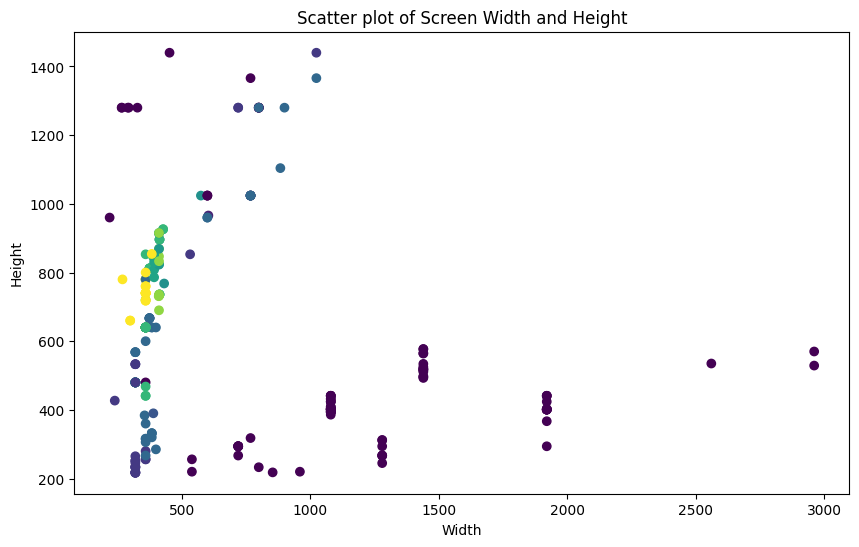

In [9]:
# plot the data

plt.figure(figsize=(10, 6))
plt.scatter(sc_data['Width'], sc_data['Height'], c=sc_data["DPR"]) 
plt.title('Scatter plot of Screen Width and Height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()  

### We notice that the dataset contains to trends of the height of the screen of a mobile device:
- The first trend is the height of the screen of a mobile device based on the width of the screen is the greater dimention.
- The second trend is the height of the screen of a mobile device based
on the height of the screen of the device is the greater dimention.

In [20]:
# copy the data to a new dataframe
sc_data_copy = sc_data.copy()

# flip the width and height columns if the width is less than the height

condition = sc_data['Width'] < sc_data['Height']
sc_data_copy.loc[condition, ['Width', 'Height']] = sc_data.loc[condition, ['Height', 'Width']].values

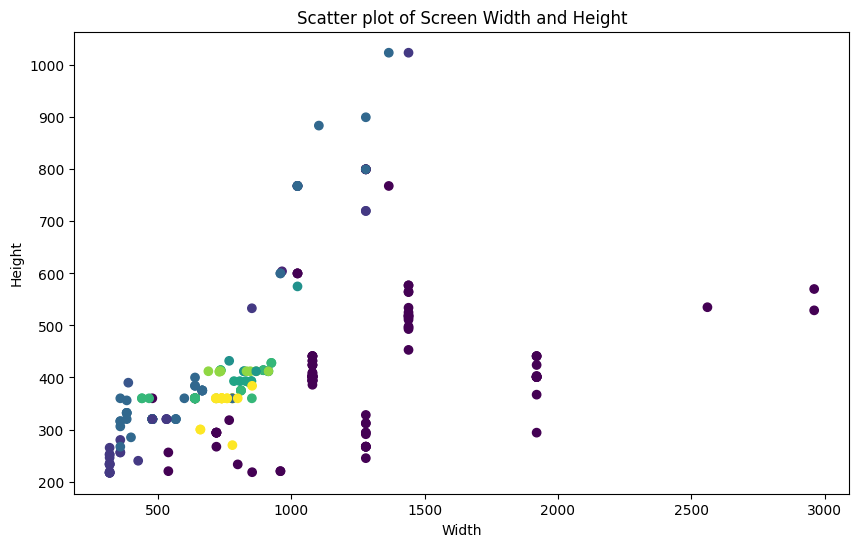

In [21]:
# plot the data

plt.figure(figsize=(10, 6))
plt.scatter(sc_data_copy['Width'], sc_data_copy['Height'], c=sc_data_copy["DPR"])
plt.title('Scatter plot of Screen Width and Height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


### *Most of the fack points in the height are in the range of  0 - 300,  so the suitable model for this dataset is the regression model.*


### Building the model

In [29]:
# create a linear regression model to predict width_greater_height
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error, r2_score 


# Feature and target variables: Predicting 'Width' given 'Height'
X = sc_data_copy[["Width"]]
y = sc_data_copy["Height"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using different metrics
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 69.86349941384655
R-squared: 0.1688653846124505


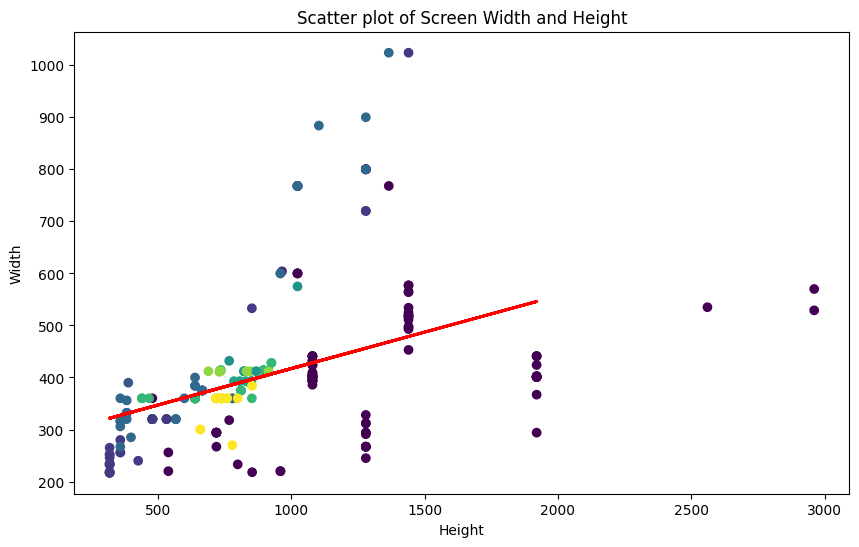

In [30]:
# draw the regression line
plt.figure(figsize=(10, 6))
plt.scatter(sc_data_copy['Width'], sc_data_copy['Height'], c=sc_data_copy["DPR"])
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Scatter plot of Screen Width and Height')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()


### *The metrics are bad, but it remains a better solution for the smaller values*

In [31]:
# save the model 
import pickle

# Save the model
filename = 'linear_regression_model.pkl'
pickle.dump(model, open('ML Models/linear_regression_model.pkl', 'wb'))
